In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:

df_preview = pandas.read_csv(
    'data.csv',
    quotechar='"',
    skipinitialspace=True,
    nrows=2
)
time0 = pandas.to_datetime(df_preview['TIME'].iloc[0])
time1 = pandas.to_datetime(df_preview['TIME'].iloc[1])
sampling_rate = 1 / (time1 - time0).total_seconds()

df = pandas.read_csv(
    'data.csv',
    quotechar='"',
    skipinitialspace=True
)

In [3]:
print(df)

                 TIME         ECG
0        18:00:05.699  661.022705
1        18:00:05.704  735.636780
2        18:00:05.709  752.442139
3        18:00:05.714  592.245361
4        18:00:05.719  637.751221
...               ...         ...
8409449  05:40:52.944    1.116215
8409450  05:40:52.949    1.444620
8409451  05:40:52.954    1.283406
8409452  05:40:52.959   -0.019222
8409453  05:40:52.964    5.249580

[8409454 rows x 2 columns]


In [ ]:

# Generate time column based on sampling rate
num_samples = len(df)
df['SECONDS_SINCE_START'] = np.arange(num_samples) / sampling_rate
df.set_index('SECONDS_SINCE_START', inplace=True)


In [5]:
# Print sampling rate
print(f"sampling rate: {sampling_rate} hz")

first_chunk = df

# Invert ECG
first_chunk['ECG'] = -first_chunk['ECG']

sampling rate: 200.0 hz


In [6]:
# R peak detection
threshold = 650
min_distance_ms = 250
min_distance_samples = int(min_distance_ms * sampling_rate / 1000)

r_peak_indices = []
prev_peak = -min_distance_samples
values = first_chunk['ECG'].values
for i in range(1, len(values) - 1):
    if values[i] > threshold and values[i] > values[i-1] and values[i] > values[i+1]:
        if i - prev_peak >= min_distance_samples:
            r_peak_indices.append(i)
            prev_peak = i

r_peak_times = first_chunk.index[r_peak_indices]

rr_intervals = np.diff(r_peak_times)
rr_interval_times = r_peak_times[1:]

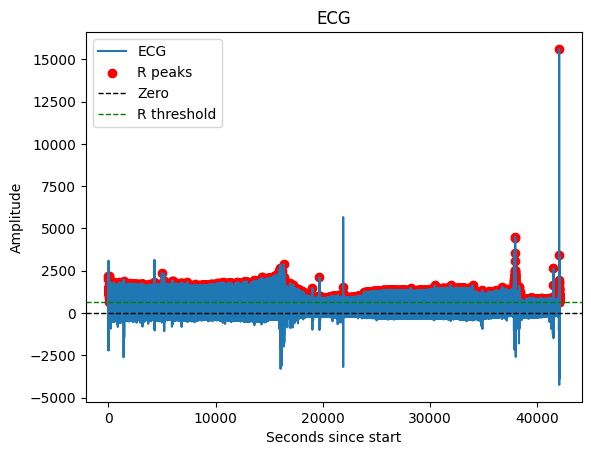

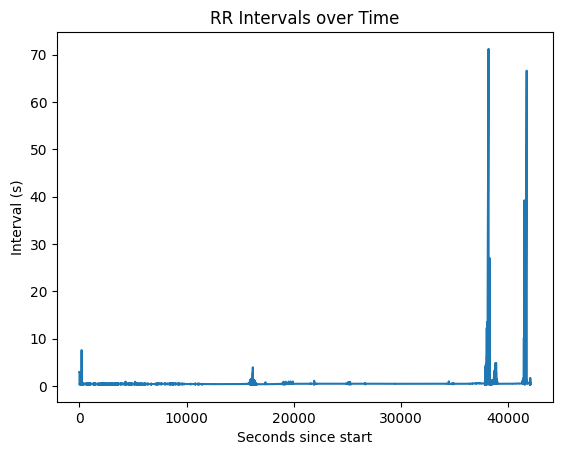

In [7]:
# Plotting

plt.figure()
plt.plot(first_chunk.index, first_chunk['ECG'], label='ECG')
plt.scatter(r_peak_times, first_chunk['ECG'].iloc[r_peak_indices],
            color='red', label='R peaks')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero')
plt.axhline(threshold, color='green', linestyle='--', linewidth=1, label='R threshold')
plt.xlabel('Seconds since start')
plt.ylabel('Amplitude')
plt.title('ECG')
plt.legend()

plt.figure()
plt.plot(rr_interval_times, rr_intervals, label='RR interval')
plt.xlabel('Seconds since start')
plt.ylabel('Interval (s)')
plt.title('RR Intervals over Time')

plt.show()